# **Machine Learning Models**


---
This repository contains three simple machine learning models for classifying exoplanets based on their discovery method. The models are based on:

Naïve Bayes

Decision Trees

Random Forest

The models are trained using the NASA Exoplanet Archive dataset (https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PS), which includes various planetary and stellar characteristics such as radius, mass, and temperature. The models predict an exoplanet's discovery method based on these features.

#Model outcomes
Naïve Bayes: train accuracy = 0.9342; test accuracy = 0.9360

Decision Trees: train accuracy = 0.9925; test accuracy = 0.9850

Random Forest: train accuracy = 1.0000; test accuracy =  0.9932

## Data Vizualization and Preprocessing

---



In [ ]:
# Load the data
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
df = pd.read_csv('planets.csv', comment='#')
df.info()

# Rename column titles for clear understanding
df.rename(columns={'pl_name': 'Planet_name'}, inplace=True)
df.rename(columns={'hostname': 'Host_name'}, inplace=True)
df.rename(columns={'discoverymethod': 'Discovery_method'}, inplace=True)
df.rename(columns={'disc_year': 'Discovery_year'}, inplace=True)
df.rename(columns={'soltype': 'Solution_type'}, inplace=True)
df.rename(columns={'discoverymethod': 'Discovery_method'}, inplace=True)
df.rename(columns={'pl_orbper': 'Orbital_period_(days)'}, inplace=True)
df.rename(columns={'pl_orbsmax': 'Orbit_Semi-Major_axis_(AU)'}, inplace=True)
df.rename(columns={'pl_rade': 'Planet_radius_(Earth_radius)'}, inplace=True)
df.rename(columns={'pl_dens': 'Planet_density_(g/cm**3)'}, inplace=True)
df.rename(columns={'pl_orbeccen': 'Eccentricity'}, inplace=True)
df.rename(columns={'pl_eqt': 'Equilibrium_Temperature_[K]'}, inplace=True)
df.rename(columns={'st_teff': 'Stellar_effective_temperature_[K]'}, inplace=True)
df.rename(columns={'st_rad': 'Stellar_radius_(Solar_radius)'}, inplace=True)
df.rename(columns={'st_mass': 'Stellar_mass_(Solar_mass)'}, inplace=True)
df.rename(columns={'st_logg': 'Stellar_surface_gravity_[log10(cm/s**2)]'}, inplace=True)
df.rename(columns={'st_dens': 'Stellar_density_(g/cm**3)'}, inplace=True)
df.rename(columns={'sy_dist': 'Distance_(PC)'}, inplace=True)
df.round(3)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5616 entries, 0 to 5615
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          5616 non-null   object 
 1   hostname         5616 non-null   object 
 2   discoverymethod  5616 non-null   object 
 3   disc_year        5616 non-null   int64  
 4   pl_orbper        5360 non-null   float64
 5   pl_orbsmax       5327 non-null   float64
 6   pl_rade          5596 non-null   float64
 7   pl_dens          5508 non-null   float64
 8   pl_orbeccen      4826 non-null   float64
 9   pl_eqt           4146 non-null   float64
 10  st_teff          5388 non-null   float64
 11  st_rad           5367 non-null   float64
 12  st_mass          5612 non-null   float64
 13  st_logg          5361 non-null   float64
 14  st_dens          5108 non-null   float64
 15  sy_dist          5593 non-null   float64
dtypes: float64(12), int64(1), object(3)
memory usage: 702.1+ KB


Discovery_year  Orbital_period_(days)  Orbit_Semi-Major_axis_(AU)  \
count     5616.000000           5.360000e+03                 5327.000000   
mean      2016.221688           7.979904e+04                    6.617928   
std          4.548443           5.493465e+06                  133.916463   
min       1992.000000           9.070629e-02                    0.004400   
25%       2014.000000           4.461884e+00                    0.053200   
50%       2016.000000           1.155546e+01                    0.103600   
75%       2020.000000           4.148466e+01                    0.302000   
max       2024.000000           4.020000e+08                 7506.000000   

       Planet_radius_(Earth_radius)  Planet_density_(g/cm**3)  Eccentricity  \
count                   5596.000000               5508.000000   4826.000000   
mean                       5.701161                  4.433658      0.077025   
std                        5.327495                 30.717251      0.150881   
min                        0.310000                  0.030000      0.000000   
25%                        1.780000                  1.380000      0.000000   
50%                        2.777000                  2.600000      0.000000   
75%                       11.882000                  4.610000      0.090000   
max                       77.342000               2000.000000      0.950000   

       Equilibrium_Temperature_[K]  Stellar_effective_temperature_[K]  \
count                  4146.000000                        5388.000000   
mean                    910.139170                        5427.928643   
std                     459.565141                        1777.856505   
min                      34.000000                         415.000000   
25%                     568.000000                        4940.000000   
50%                     818.000000                        5553.500000   
75%                    1156.000000                        5900.000000   
max                    4050.000000                       57000.000000   

       Stellar_radius_(Solar_radius)  Stellar_mass_(Solar_mass)  \
count                    5367.000000                5612.000000   
mean                        1.546139                   0.948902   
std                         4.197887                   0.423686   
min                         0.010000                   0.010000   
25%                         0.780000                   0.790000   
50%                         0.950000                   0.940000   
75%                         1.250000                   1.090000   
max                       109.460000                  10.940000   

       Stellar_surface_gravity_[log10(cm/s**2)]  Stellar_density_(g/cm**3)  \
count                               5361.000000                5108.000000   
mean                                   4.376381                   3.363643   
std                                    0.441646                   8.267366   
min                                    0.540000                   0.002600   
25%                                    4.290000                   0.725320   
50%                                    4.450000                   1.654335   
75%                                    4.570000                   3.016250   
max                                    7.920000                 187.952400   

       Distance_(PC)  
count    5593.000000  
mean      702.183976  
std      1123.798397  
min         1.301190  
25%       111.155000  
50%       406.529000  
75%       852.204000  
max      8500.000000

In [ ]:
df.round(3)

Planet_name Host_name Discovery_method  Discovery_year  \
0       11 Com b    11 Com  Radial Velocity            2007   
1       11 UMi b    11 UMi  Radial Velocity            2009   
2       14 And b    14 And  Radial Velocity            2008   
3       14 Her b    14 Her  Radial Velocity            2002   
4     16 Cyg B b  16 Cyg B  Radial Velocity            1996   
...          ...       ...              ...             ...   
5611   ups And b   ups And  Radial Velocity            1996   
5612   ups And c   ups And  Radial Velocity            1999   
5613   ups And d   ups And  Radial Velocity            1999   
5614   ups Leo b   ups Leo  Radial Velocity            2021   
5615    xi Aql b    xi Aql  Radial Velocity            2007   

      Orbital_period_(days)  Orbit_Semi-Major_axis_(AU)  \
0                   323.210                       1.178   
1                   516.220                       1.530   
2                   186.760                       0.775   
3                  1765.039                       2.774   
4                   798.500                       1.660   
...                     ...                         ...   
5611                  4.617                       0.059   
5612                241.258                       0.828   
5613               1276.460                       2.513   
5614                385.200                       1.180   
5615                136.970                       0.625   

      Planet_radius_(Earth_radius)  Planet_density_(g/cm**3)  Eccentricity  \
0                             12.2                    14.900         0.238   
1                             12.3                    13.800         0.080   
2                             13.1                     2.760         0.000   
3                             12.6                     7.030         0.373   
4                             13.5                     1.260         0.680   
...                            ...                       ...           ...   
5611                          14.0                     0.438         0.022   
5612                          12.3                    13.100         0.260   
5613                          12.5                     9.170         0.299   
5614                          14.2                     0.311         0.320   
5615                          13.4                     1.410         0.059   

      Equilibrium_Temperature_[K]  Stellar_effective_temperature_[K]  \
0                             NaN                            4874.00   
1                             NaN                            4213.00   
2                             NaN                            4888.00   
3                             NaN                            5338.00   
4                             NaN                            5750.00   
...                           ...                                ...   
5611                          NaN                            6156.77   
5612                          NaN                            6156.77   
5613                          NaN                            6156.77   
5614                          NaN                            4836.00   
5615                          NaN                            4841.00   

      Stellar_radius_(Solar_radius)  Stellar_mass_(Solar_mass)  \
0                             13.76                       2.09   
1                             29.79                       2.78   
2                             11.55                       1.78   
3                              0.93                       0.91   
4                              1.13                       1.08   
...                             ...                        ...   
5611                           1.56                       1.30   
5612                           1.56                       1.30   
5613                           1.56                       1.30   
5614                          11.22                       1.48   
5615       

In [ ]:
df.shape

(5616, 16)

In [ ]:
df['Discovery_method'].value_counts()

Discovery_method
Transit                          4171
Radial Velocity                  1089
Microlensing                      217
Imaging                            70
Transit Timing Variations          29
Eclipse Timing Variations          17
Orbital Brightness Modulation       9
Pulsar Timing                       8
Astrometry                          3
Pulsation Timing Variations         2
Disk Kinematics                     1
Name: count, dtype: int64

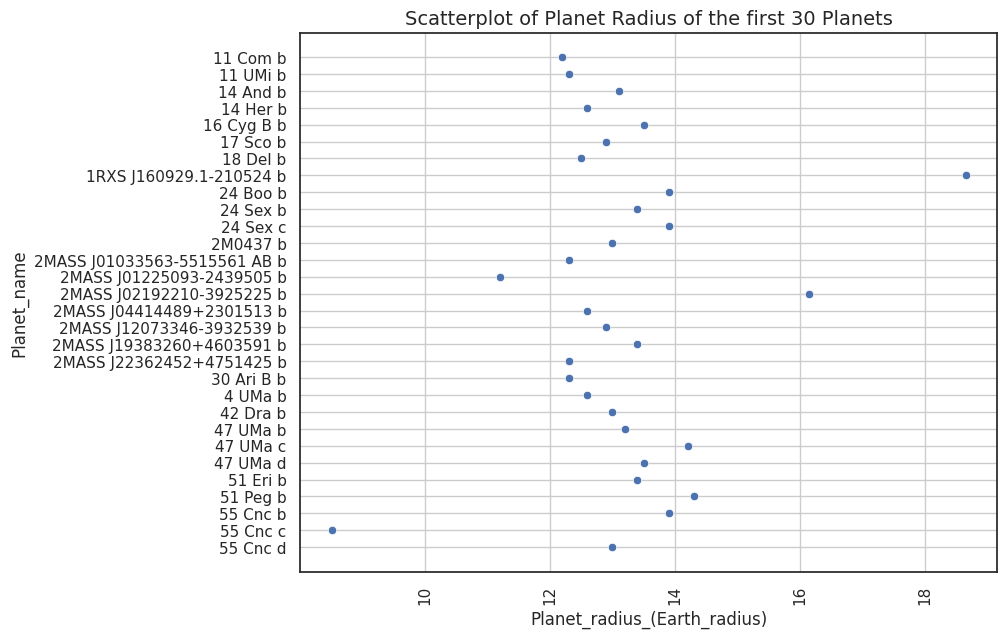

In [ ]:
# A scatterplot of radii of the first 30 planets

plt.figure(figsize=(9, 7))
sns.scatterplot(x=df['Planet_radius_(Earth_radius)'].head(30), y=df['Planet_name'].head(30))
plt.xlabel('Planet_radius_(Earth_radius)', fontsize=12)
plt.ylabel('Planet_name', fontsize=12)
plt.title('Scatterplot of Planet Radius of the first 30 Planets', fontsize=14)
plt.xticks(rotation=90)
plt.grid()
plt.show()

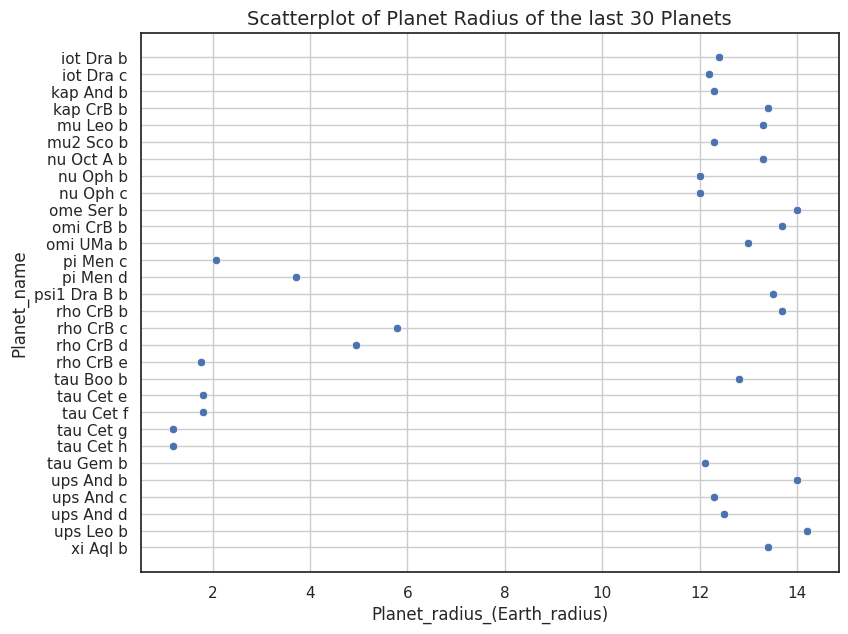

In [ ]:
# A scatterplot of radii of the last 30 planets

plt.figure(figsize=(9, 7))
sns.scatterplot(x=df['Planet_radius_(Earth_radius)'].tail(30), y=df['Planet_name'].tail(30))
plt.xlabel('Planet_radius_(Earth_radius)', fontsize=12)
plt.ylabel('Planet_name', fontsize=12)
plt.title('Scatterplot of Planet Radius of the last 30 Planets', fontsize=14)
plt.xticks()
plt.grid()
plt.show()

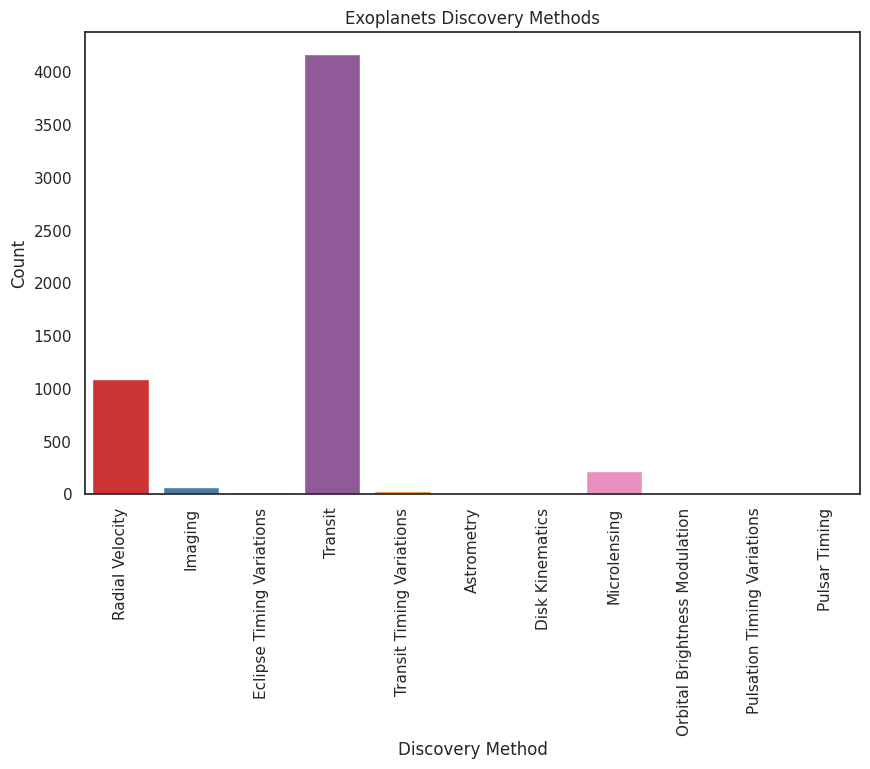

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Discovery_method', palette='Set1')
plt.xticks(rotation=90)
plt.title('Exoplanets Discovery Methods')
plt.xlabel('Discovery Method')
plt.ylabel('Count')
plt.show()

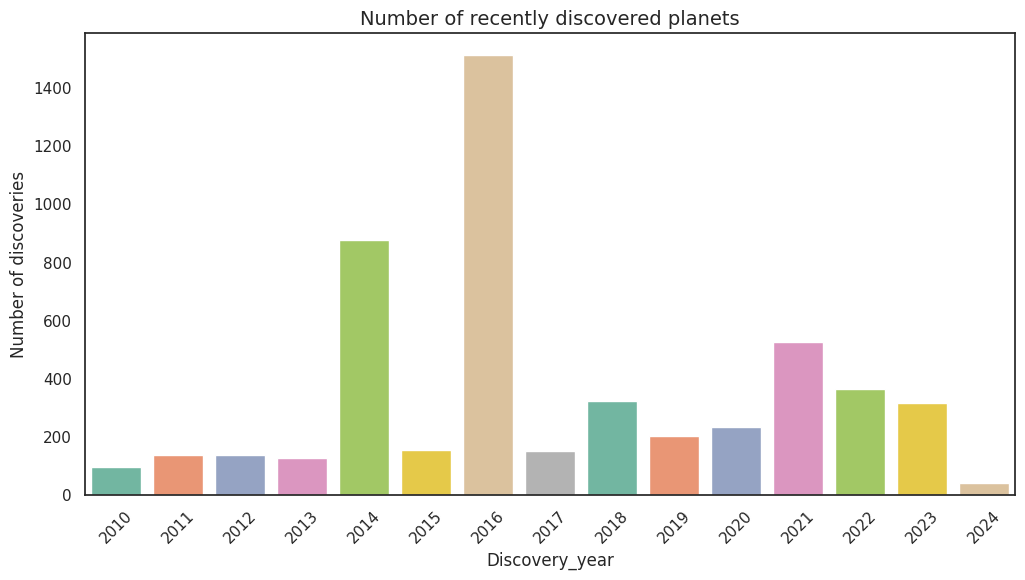

In [ ]:
# A barchart of recently discovered planets

df['Discovery_Year'] = pd.to_datetime(df['Discovery_year'], format='%Y').dt.year
df_recent = df[df['Discovery_Year'].between(2010, 2024)]
discovery_counts = df_recent['Discovery_Year'].value_counts().sort_index(ascending=True)

plt.figure(figsize=(12, 6))
sns.barplot(x=discovery_counts.index, y=discovery_counts.values, palette='Set2')
plt.xlabel('Discovery_year', fontsize=12)
plt.ylabel('Number of discoveries', fontsize=12)
plt.title('Number of recently discovered planets', fontsize=14)
plt.xticks(rotation=45)
plt.show()

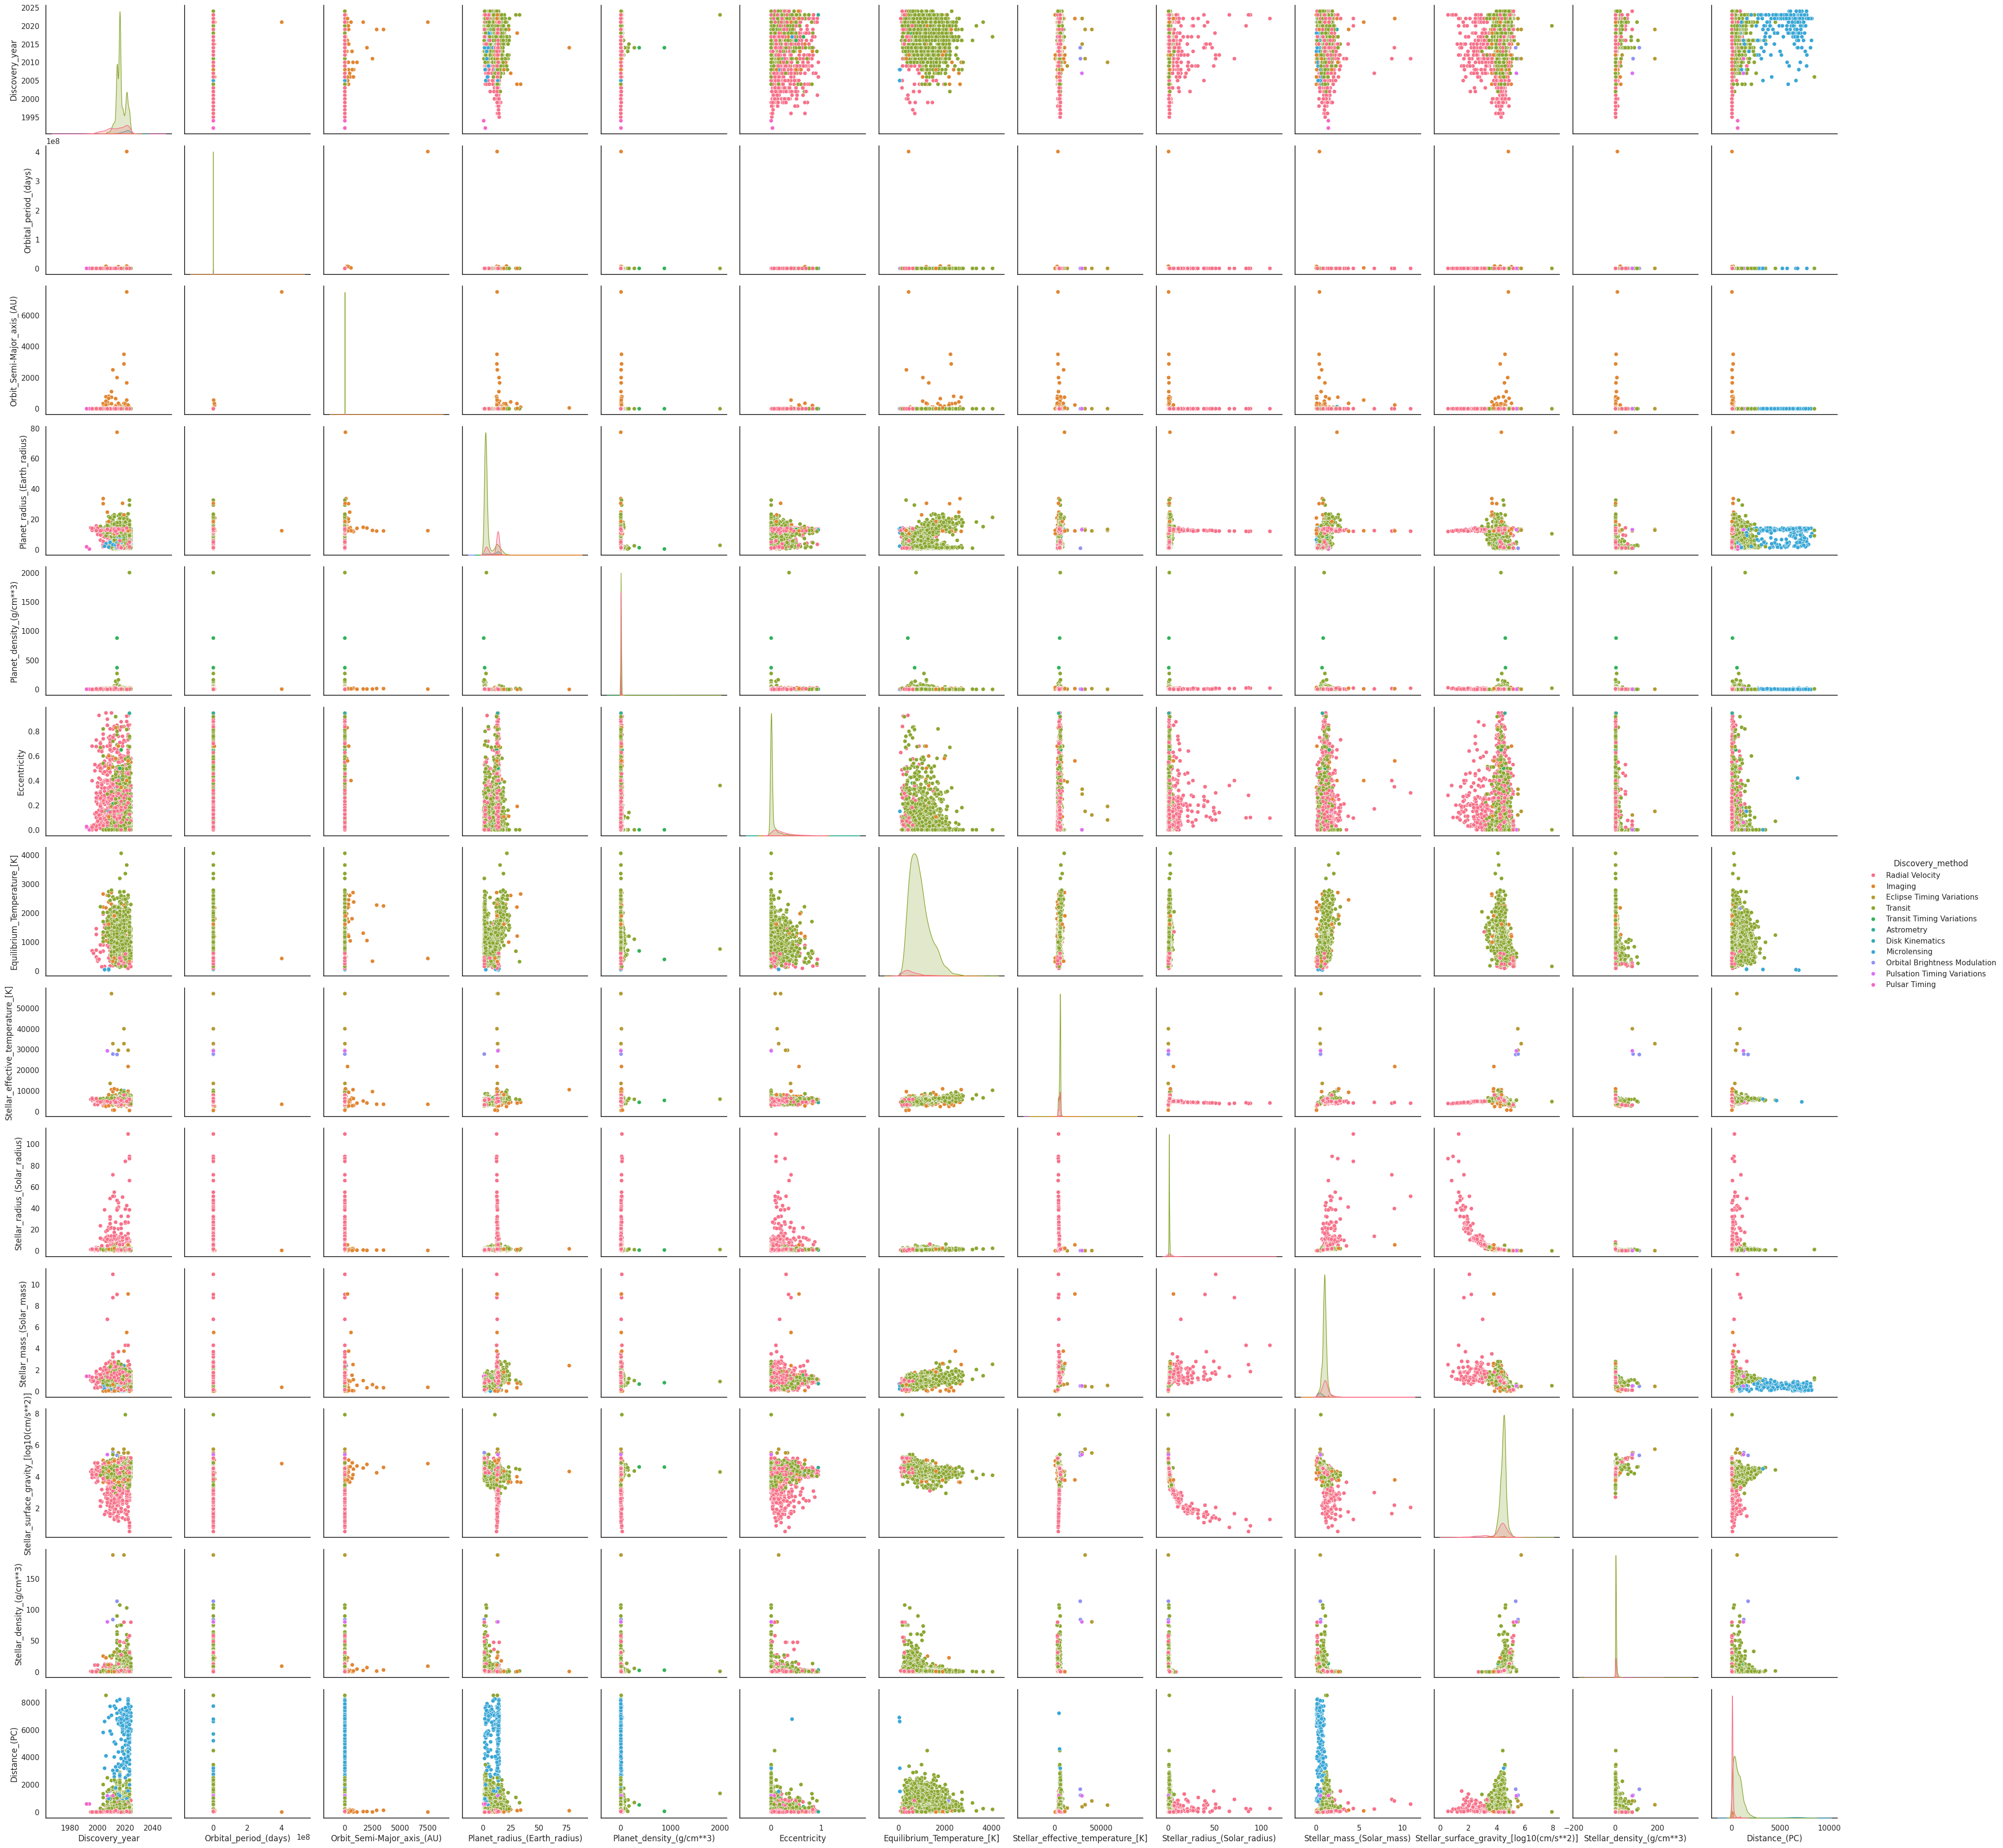

In [ ]:
sns.pairplot(df.drop("Planet_name", axis=1), hue="Discovery_method", height=3)

In [ ]:
# DATA PREPROCESSING

# Calculate missing values by column
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Counts', 1 : 'Percentage'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        'Percentage', ascending=False).round(1)
    return mis_val_table_ren_columns
missing_values_table(df)

Missing Counts  Percentage
Equilibrium_Temperature_[K]                         1470        26.2
Eccentricity                                         790        14.1
Stellar_density_(g/cm**3)                            508         9.0
Orbit_Semi-Major_axis_(AU)                           289         5.1
Orbital_period_(days)                                256         4.6
Stellar_surface_gravity_[log10(cm/s**2)]             255         4.5
Stellar_radius_(Solar_radius)                        249         4.4
Stellar_effective_temperature_[K]                    228         4.1
Planet_density_(g/cm**3)                             108         1.9
Distance_(PC)                                         23         0.4
Planet_radius_(Earth_radius)                          20         0.4
Stellar_mass_(Solar_mass)                              4         0.1

In [ ]:
# Revome missing values
df_clean = df.dropna()
print(df_clean.isnull().sum())

Planet_name                                 0
Host_name                                   0
Discovery_method                            0
Discovery_year                              0
Orbital_period_(days)                       0
Orbit_Semi-Major_axis_(AU)                  0
Planet_radius_(Earth_radius)                0
Planet_density_(g/cm**3)                    0
Eccentricity                                0
Equilibrium_Temperature_[K]                 0
Stellar_effective_temperature_[K]           0
Stellar_radius_(Solar_radius)               0
Stellar_mass_(Solar_mass)                   0
Stellar_surface_gravity_[log10(cm/s**2)]    0
Stellar_density_(g/cm**3)                   0
Distance_(PC)                               0
dtype: int64


In [ ]:
# Drop duplicate rows

df_clean = df_clean.drop_duplicates()


In [ ]:
df_clean.round(3)

Planet_name Host_name Discovery_method  Discovery_year  \
25      51 Eri b    51 Eri          Imaging            2015   
27      55 Cnc b    55 Cnc  Radial Velocity            1996   
30      55 Cnc e    55 Cnc  Radial Velocity            2004   
46      AF Lep b    AF Lep          Imaging            2023   
47      AU Mic b    AU Mic          Transit            2020   
...          ...       ...              ...             ...   
5565      XO-7 b      XO-7          Transit            2019   
5574   bet Pic b   bet Pic          Imaging            2008   
5598    pi Men c  HD 39091          Transit            2018   
5601   rho CrB b   rho CrB  Radial Velocity            1997   
5602   rho CrB c   rho CrB  Radial Velocity            2016   

      Orbital_period_(days)  Orbit_Semi-Major_axis_(AU)  \
25                11688.000                      13.200   
27                   14.652                       0.113   
30                    0.737                       0.015   
46                 8030.000                       8.400   
47                    8.463                       0.064   
...                     ...                         ...   
5565                  2.864                       0.044   
5574               8617.510                      10.018   
5598                  6.268                       0.069   
5601                 39.844                       0.224   
5602                102.190                       0.421   

      Planet_radius_(Earth_radius)  Planet_density_(g/cm**3)  Eccentricity  \
25                          13.400                     1.450         0.450   
27                          13.900                     0.540         0.000   
30                           1.875                     6.660         0.050   
46                          13.100                     2.490         0.240   
47                           3.957                     1.320         0.186   
...                            ...                       ...           ...   
5565                        15.390                     0.340         0.038   
5574                        18.495                     3.240         0.106   
5598                         2.060                     2.820         0.077   
5601                        13.700                     0.742         0.038   
5602                         5.780                     0.802         0.096   

      Equilibrium_Temperature_[K]  Stellar_effective_temperature_[K]  \
25                          700.0                            7295.00   
27                          700.0                            5172.00   
30                         1958.0                            5172.00   
46                         1400.0                            6130.00   
47                          600.0                            3665.00   
...                           ...                                ...   
5565                       1743.0                            6250.00   
5574                       1612.0                            8038.68   
5598                       1170.0                            6037.00   
5601                        614.0                            5817.00   
5602                        448.0                            5817.00   

      Stellar_radius_(Solar_radius)  Stellar_mass_(Solar_mass)  \
25                             1.49                       1.75   
27                             0.94                       0.91   
30                             0.94                       0.91   
46                             1.25                       1.20   
47                             0.82                       0.50   
...                             ...                        ...   
5565                           1.48                       1.41   
5574                           1.54                       1.80   
5598                           1.19                       1.10   
5601                           1.35                       0.95   
5602       

In [ ]:
# Assigning independent variables (all columns except the target column)

X = df_clean.drop(columns='Discovery_method')  # Drop the target column

# Assigning the target variable (column index 2)
y = df_clean['Discovery_method']

print("Independent Variables (X):")
print(X)
print("\nTarget Variable (y):")
print(y)

Independent Variables (X):
     Planet_name Host_name  Discovery_year  Orbital_period_(days)  \
25      51 Eri b    51 Eri            2015           11688.000000   
27      55 Cnc b    55 Cnc            1996              14.651600   
30      55 Cnc e    55 Cnc            2004               0.736547   
46      AF Lep b    AF Lep            2023            8030.000000   
47      AU Mic b    AU Mic            2020               8.462999   
...          ...       ...             ...                    ...   
5565      XO-7 b      XO-7            2019               2.864142   
5574   bet Pic b   bet Pic            2008            8617.509520   
5598    pi Men c  HD 39091            2018               6.267910   
5601   rho CrB b   rho CrB            1997              39.843800   
5602   rho CrB c   rho CrB            2016             102.190000   

      Orbit_Semi-Major_axis_(AU)  Planet_radius_(Earth_radius)  \
25                      13.20000                        13.400   
27          

In [ ]:
# Encoding categorical variables
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_clean['Planet_name'] = labelencoder.fit_transform(df_clean['Planet_name'])
df_clean['Host_name'] = labelencoder.fit_transform(df_clean['Host_name'])
df_clean['Discovery_method'] = labelencoder.fit_transform(df_clean['Discovery_method'])
df_clean.round(3)

Planet_name  Host_name  Discovery_method  Discovery_year  \
25              0          0                 0            2015   
27              1          1                 2            1996   
30              2          1                 2            2004   
46              3          2                 0            2023   
47              4          3                 3            2020   
...           ...        ...               ...             ...   
5565         3663       2746                 3            2019   
5574         3664       2747                 0            2008   
5598         3665        259                 3            2018   
5601         3666       2748                 2            1997   
5602         3667       2748                 2            2016   

      Orbital_period_(days)  Orbit_Semi-Major_axis_(AU)  \
25                11688.000                      13.200   
27                   14.652                       0.113   
30                    0.737                       0.015   
46                 8030.000                       8.400   
47                    8.463                       0.064   
...                     ...                         ...   
5565                  2.864                       0.044   
5574               8617.510                      10.018   
5598                  6.268                       0.069   
5601                 39.844                       0.224   
5602                102.190                       0.421   

      Planet_radius_(Earth_radius)  Planet_density_(g/cm**3)  Eccentricity  \
25                          13.400                     1.450         0.450   
27                          13.900                     0.540         0.000   
30                           1.875                     6.660         0.050   
46                          13.100                     2.490         0.240   
47                           3.957                     1.320         0.186   
...                            ...                       ...           ...   
5565                        15.390                     0.340         0.038   
5574                        18.495                     3.240         0.106   
5598                         2.060                     2.820         0.077   
5601                        13.700                     0.742         0.038   
5602                         5.780                     0.802         0.096   

      Equilibrium_Temperature_[K]  Stellar_effective_temperature_[K]  \
25                          700.0                            7295.00   
27                          700.0                            5172.00   
30                         1958.0                            5172.00   
46                         1400.0                            6130.00   
47                          600.0                            3665.00   
...                           ...                                ...   
5565                       1743.0                            6250.00   
5574                       1612.0                            8038.68   
5598                       1170.0                            6037.00   
5601                        614.0                            5817.00   
5602                        448.0                            5817.00   

      Stellar_radius_(Solar_radius)  Stellar_mass_(Solar_mass)  \
25                             1.49                       1.75   
27                             0.94                       0.91   
30                             0.94                       0.91   
46                             1.25                       1.20   
47                             0.82                       0.50   
...                             ...                        ...   
5565                           1.48                       1.41   
5574                           1.54                       1.80   
5598                           1.19                       1.10   
5601                           1.35       

Discovery_method
2    3524
1     117
3      16
0      10
4       1
Name: count, dtype: int64

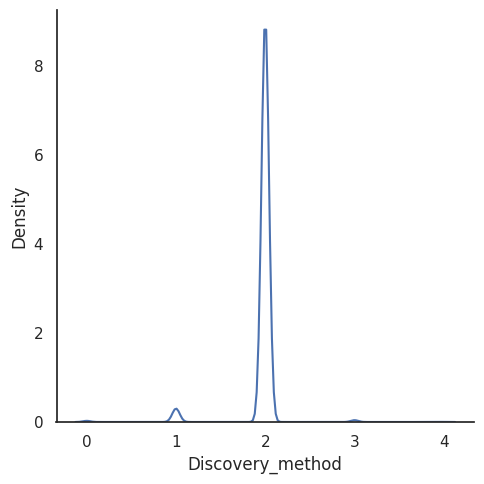

In [ ]:
# Factorize categorical variables
df_clean['Planet_name'] = pd.factorize(df_clean['Planet_name'])[0]
df_clean['Host_name'] = pd.factorize(df_clean['Host_name'])[0]
df_clean['Discovery_method'] = pd.factorize(df_clean['Discovery_method'])[0]
sns.displot(df_clean, x="Discovery_method", kind="kde")
df_clean['Discovery_method'].value_counts()

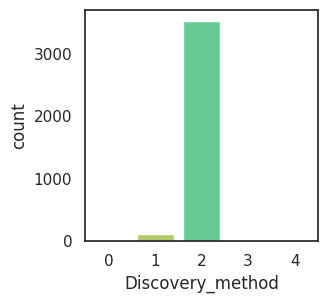

Original target distribution: Counter({4: 500, 3: 200, 2: 150, 1: 100, 0: 50})
Resampled target distribution: Counter({4: 500, 0: 500, 3: 500, 1: 500, 2: 500})


<Axes: xlabel='Discovery_method', ylabel='count'>

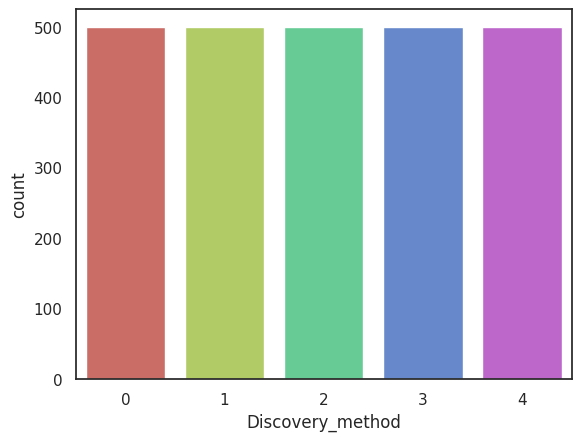

In [ ]:
# class balancing using SMOTE
import pandas as pd
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from collections import Counter

plt.figure(figsize=(3,3))
df_clean['Discovery_method'].value_counts()
sns.countplot(x='Discovery_method', data=df_clean, palette='hls')
plt.show()
plt.savefig('Discovery_method')

# Generate a synthetic dataset for demonstration (5 classes)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=4, n_redundant=10,
                           n_clusters_per_class=1, weights=[0.05, 0.1, 0.15, 0.2, 0.5],
                           flip_y=0, random_state=42, n_classes=5)

# Convert to DataFrame
df = pd.DataFrame(X)
df['Discovery_method'] = y

# Check the distribution of the target variable
print("Original target distribution:", Counter(y))

# Split features and target
X = df.drop('Discovery_method', axis=1)
y = df['Discovery_method']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the distribution of the resampled target variable
print("Resampled target distribution:", Counter(y_resampled))

sns.countplot(x = y_resampled, palette='hls')

In [ ]:
# Convert the cleaned data into csv. file
from google.colab import files

processed_dataset = df_clean
processed_file_name = 'planets_clean.csv'
processed_dataset.to_csv(processed_file_name, index=False)
files.download(processed_file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Naive Bayes model

---

In [ ]:
# Load dataset
import pandas as pd

df = pd.read_csv('planets_clean.csv', comment='#')
df.round(3)

Planet_name  Host_name  Discovery_method  Discovery_year  \
0               0          0                 0            2015   
1               1          1                 1            1996   
2               2          1                 1            2004   
3               3          2                 0            2023   
4               4          3                 2            2020   
...           ...        ...               ...             ...   
3663         3663       2745                 2            2019   
3664         3664       2746                 0            2008   
3665         3665       2747                 2            2018   
3666         3666       2748                 1            1997   
3667         3667       2748                 1            2016   

      Orbital_period_(days)  Orbit_Semi-Major_axis_(AU)  \
0                 11688.000                      13.200   
1                    14.652                       0.113   
2                     0.737                       0.015   
3                  8030.000                       8.400   
4                     8.463                       0.064   
...                     ...                         ...   
3663                  2.864                       0.044   
3664               8617.510                      10.018   
3665                  6.268                       0.069   
3666                 39.844                       0.224   
3667                102.190                       0.421   

      Planet_radius_(Earth_radius)  Planet_density_(g/cm**3)  Eccentricity  \
0                           13.400                     1.450         0.450   
1                           13.900                     0.540         0.000   
2                            1.875                     6.660         0.050   
3                           13.100                     2.490         0.240   
4                            3.957                     1.320         0.186   
...                            ...                       ...           ...   
3663                        15.390                     0.340         0.038   
3664                        18.495                     3.240         0.106   
3665                         2.060                     2.820         0.077   
3666                        13.700                     0.742         0.038   
3667                         5.780                     0.802         0.096   

      Equilibrium_Temperature_[K]  Stellar_effective_temperature_[K]  \
0                           700.0                            7295.00   
1                           700.0                            5172.00   
2                          1958.0                            5172.00   
3                          1400.0                            6130.00   
4                           600.0                            3665.00   
...                           ...                                ...   
3663                       1743.0                            6250.00   
3664                       1612.0                            8038.68   
3665                       1170.0                            6037.00   
3666                        614.0                            5817.00   
3667                        448.0                            5817.00   

      Stellar_radius_(Solar_radius)  Stellar_mass_(Solar_mass)  \
0                              1.49                       1.75   
1                              0.94                       0.91   
2                              0.94                       0.91   
3                              1.25                       1.20   
4                              0.82                       0.50   
...                             ...                        ...   
3663                           1.48                       1.41   
3664                           1.54                       1.80   
3665                           1.19                       1.10   
3666                           1.35       

In [ ]:
df['Discovery_method'].value_counts()

Discovery_method
2    3524
1     117
3      16
0      10
4       1
Name: count, dtype: int64

In [ ]:
# NAIVE BAYES MODEL

# Variable assignment
X = df.drop('Discovery_method', axis=1)
y = df['Discovery_method'];
y.head()

0    0
1    1
2    1
3    0
4    2
Name: Discovery_method, dtype: int64

In [ ]:
# Data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)
X_test[0:5]

Planet_name  Host_name  Discovery_year  Orbital_period_(days)  \
1399         1399       1125            2014               8.180848   
1857         1857       1491            2014               5.370647   
102           102         85            2011               3.039577   
3169         3169       2323            2019               2.253114   
3155         3155       2310            2016               7.964315   

      Orbit_Semi-Major_axis_(AU)  Planet_radius_(Earth_radius)  \
1399                     0.07200                          2.32   
1857                     0.06100                          2.47   
102                      0.04000                         11.43   
3169                     0.02191                          0.85   
3155                     0.07340                          2.21   

      Planet_density_(g/cm**3)  Eccentricity  Equilibrium_Temperature_[K]  \
1399                      2.64         0.000                        716.0   
1857                    273.00         0.000                       1096.0   
102                       0.76         0.000                       1092.0   
3169                      3.60         0.103                        627.0   
3155                      2.81         0.000                        805.0   

      Stellar_effective_temperature_[K]  Stellar_radius_(Solar_radius)  \
1399                             5211.0                           0.77   
1857                             5821.0                           1.11   
102                              5316.0                           0.86   
3169                             3415.0                           0.30   
3155                             5074.0                           0.78   

      Stellar_mass_(Solar_mass)  Stellar_surface_gravity_[log10(cm/s**2)]  \
1399                       0.79                                      4.54   
1857                       1.00                                      4.36   
102                        0.92                                      4.53   
3169                       0.27                                      4.86   
3155                       0.82                                      4.58   

      Stellar_density_(g/cm**3)  Distance_(PC)  
1399                    0.42495       560.8850  
1857                    5.54994       703.3020  
102                     1.99758       199.1730  
3169                   12.89991        10.6194  
3155                   18.99927       491.9780

In [ ]:
y_test.head()

1399    2
1857    2
102     2
3169    2
3155    2
Name: Discovery_method, dtype: int64

In [ ]:
# Data normalization
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

Accuracy: 0.9686648501362398
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.50      0.05      0.10        19
           2       0.97      1.00      0.98       710
           3       0.00      0.00      0.00         2

    accuracy                           0.97       734
   macro avg       0.37      0.26      0.27       734
weighted avg       0.95      0.97      0.96       734

[[  0   1   2   0]
 [  0   1  18   0]
 [  0   0 710   0]
 [  0   0   2   0]]


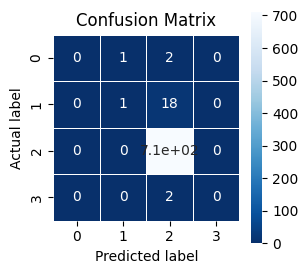

In [ ]:
# Perform multinomial naive bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

model = MultinomialNB()
model.fit(X_train_norm, y_train)
y_pred = model.predict(X_test_norm)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Classification Report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.xlabel('Predicted label');
plt.ylabel('Actual label');
plt.title("Confusion Matrix", size = 12);

Training Accuracy: 0.9342
Test Accuracy: 0.9360


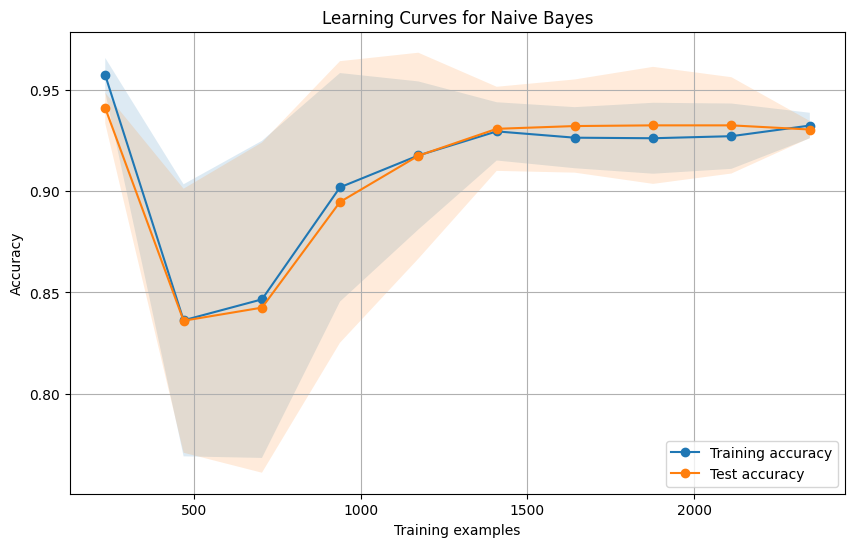

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Initialize Gaussian Naive Bayes classifier
nb = GaussianNB()

# Train the model
nb.fit(X_train, y_train)

# Predict on training set
train_predictions = nb.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Predict on test set
test_predictions = nb.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plotting learning curves
train_sizes, train_scores, test_scores = learning_curve(nb, X_train, y_train, cv=5,
                                                        train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training accuracy', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, label='Test accuracy', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)
plt.xlabel('Training examples')
plt.ylabel('Accuracy')
plt.title('Learning curves for Naive Bayes')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Decision Trees Model

---


In [ ]:
# Load dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image
from sklearn import tree
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv('planets_clean.csv', comment='#')
df.round(3)

Planet_name  Host_name  Discovery_method  Discovery_year  \
0               0          0                 0            2015   
1               1          1                 1            1996   
2               2          1                 1            2004   
3               3          2                 0            2023   
4               4          3                 2            2020   
...           ...        ...               ...             ...   
3663         3663       2745                 2            2019   
3664         3664       2746                 0            2008   
3665         3665       2747                 2            2018   
3666         3666       2748                 1            1997   
3667         3667       2748                 1            2016   

      Orbital_period_(days)  Orbit_Semi-Major_axis_(AU)  \
0                 11688.000                      13.200   
1                    14.652                       0.113   
2                     0.737                       0.015   
3                  8030.000                       8.400   
4                     8.463                       0.064   
...                     ...                         ...   
3663                  2.864                       0.044   
3664               8617.510                      10.018   
3665                  6.268                       0.069   
3666                 39.844                       0.224   
3667                102.190                       0.421   

      Planet_radius_(Earth_radius)  Planet_density_(g/cm**3)  Eccentricity  \
0                           13.400                     1.450         0.450   
1                           13.900                     0.540         0.000   
2                            1.875                     6.660         0.050   
3                           13.100                     2.490         0.240   
4                            3.957                     1.320         0.186   
...                            ...                       ...           ...   
3663                        15.390                     0.340         0.038   
3664                        18.495                     3.240         0.106   
3665                         2.060                     2.820         0.077   
3666                        13.700                     0.742         0.038   
3667                         5.780                     0.802         0.096   

      Equilibrium_Temperature_[K]  Stellar_effective_temperature_[K]  \
0                           700.0                            7295.00   
1                           700.0                            5172.00   
2                          1958.0                            5172.00   
3                          1400.0                            6130.00   
4                           600.0                            3665.00   
...                           ...                                ...   
3663                       1743.0                            6250.00   
3664                       1612.0                            8038.68   
3665                       1170.0                            6037.00   
3666                        614.0                            5817.00   
3667                        448.0                            5817.00   

      Stellar_radius_(Solar_radius)  Stellar_mass_(Solar_mass)  \
0                              1.49                       1.75   
1                              0.94                       0.91   
2                              0.94                       0.91   
3                              1.25                       1.20   
4                              0.82                       0.50   
...                             ...                        ...   
3663                           1.48                       1.41   
3664                           1.54                       1.80   
3665                           1.19                       1.10   
3666                           1.35       

In [ ]:
df['Discovery_method'].value_counts()

Discovery_method
2    3524
1     117
3      16
0      10
4       1
Name: count, dtype: int64

In [ ]:
# DECISION TREE MODEL

import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Variable assignment
X = df.drop('Discovery_method', axis=1)
y = df['Discovery_method']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

dtc = DecisionTreeClassifier().fit(X_train,y_train)
y_p = dtc.predict(X_test)

# Feature Selection
# IV and TV
X = df.drop('Discovery_method', axis=1)
y = df['Discovery_method'];

print(X.shape)
print(X.columns)
print(y.head())

(3668, 15)
Index(['Planet_name', 'Host_name', 'Discovery_year', 'Orbital_period_(days)',
       'Orbit_Semi-Major_axis_(AU)', 'Planet_radius_(Earth_radius)',
       'Planet_density_(g/cm**3)', 'Eccentricity',
       'Equilibrium_Temperature_[K]', 'Stellar_effective_temperature_[K]',
       'Stellar_radius_(Solar_radius)', 'Stellar_mass_(Solar_mass)',
       'Stellar_surface_gravity_[log10(cm/s**2)]', 'Stellar_density_(g/cm**3)',
       'Distance_(PC)'],
      dtype='object')
0    0
1    1
2    1
3    0
4    2
Name: Discovery_method, dtype: int64


In [ ]:
y_test.head()

1399    2
1857    2
102     2
3169    2
3155    2
Name: Discovery_method, dtype: int64

In [ ]:
# Create decision tree classifer object
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print(dt.get_params())

# Model Accuracy
print("\nAccuracy:", accuracy_score(y_test, y_pred).round(2))

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}

Accuracy: 0.98


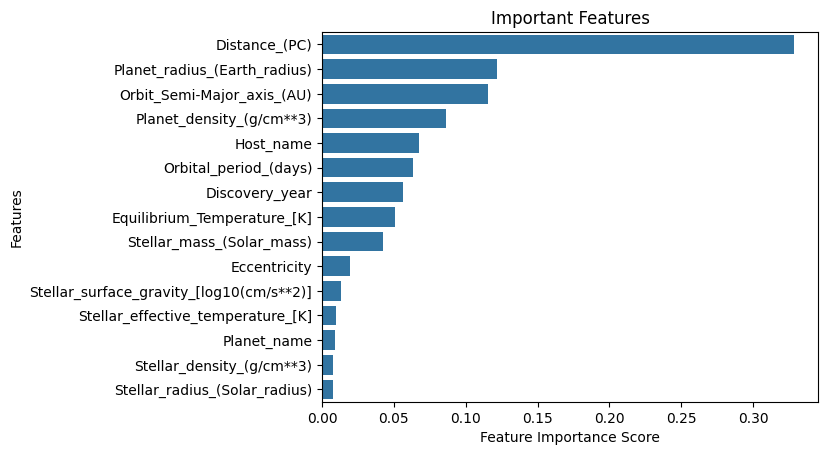

In [ ]:
# Features visualization
import matplotlib.pyplot as plt
feature_imp = pd.Series(dtc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp[:15], y=feature_imp.index[:15])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features")
plt.show()

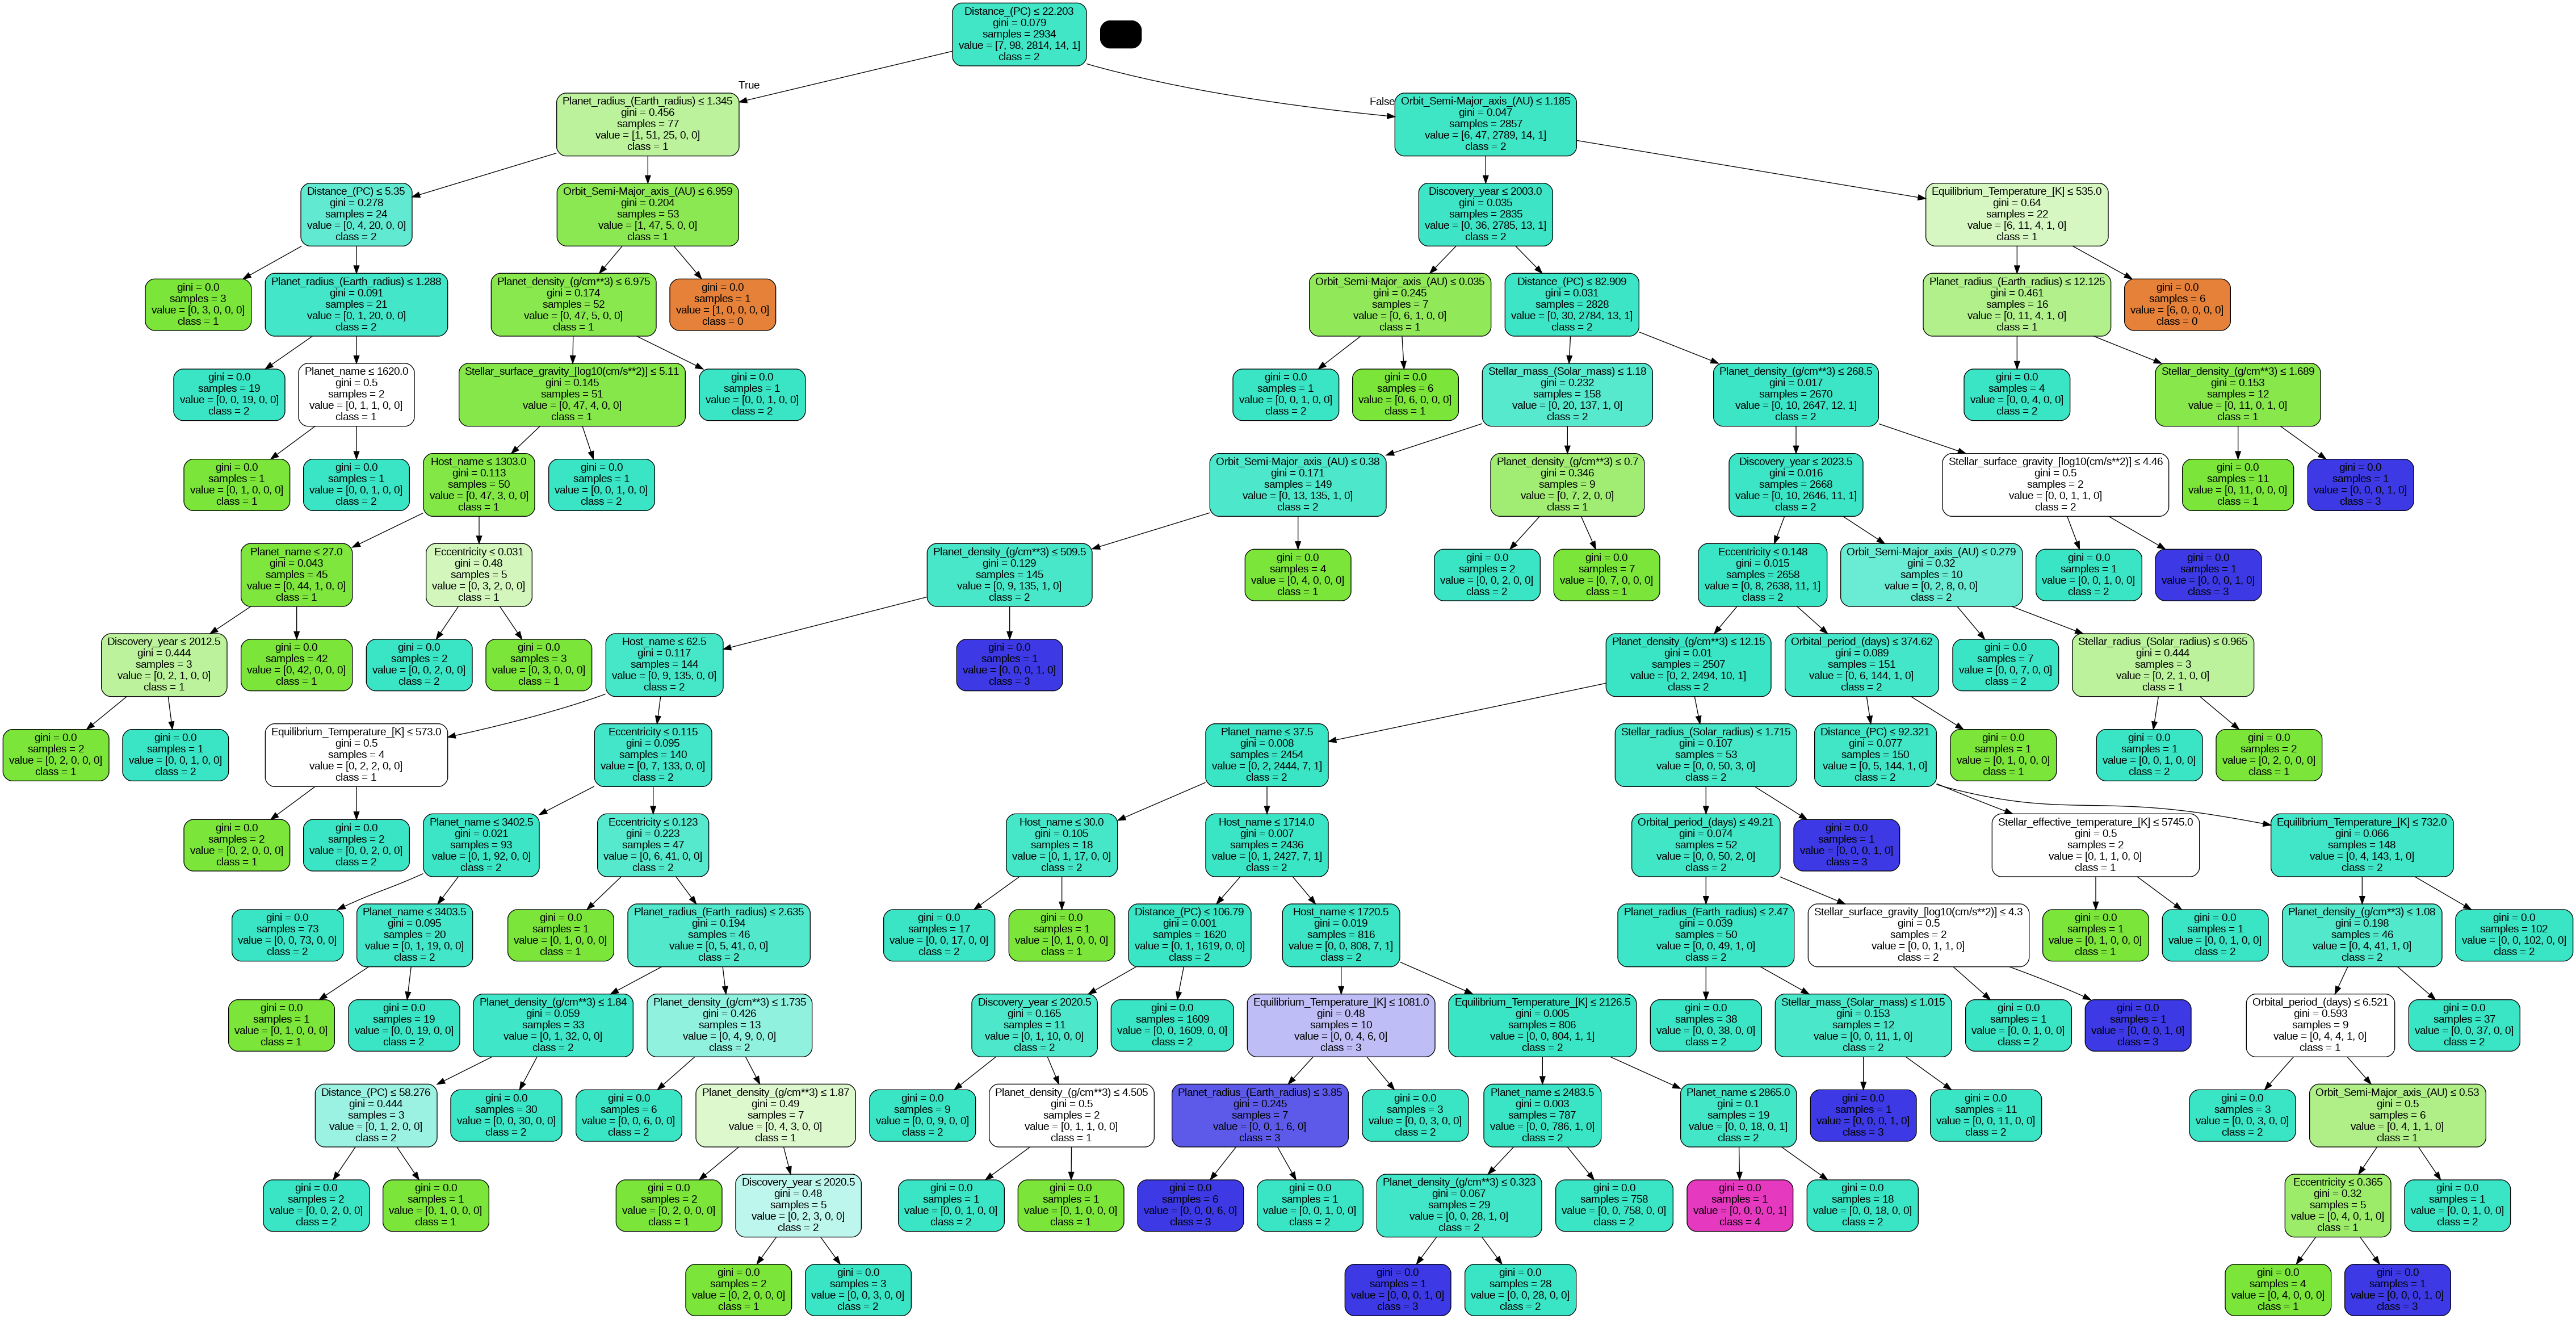

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=X.columns, class_names=['0', '1', '2', '3', '4'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Planets1.png')
Image(graph.create_png())

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
Accuracy: 0.9659400544959128
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.46      0.84      0.59        19
           2       1.00      0.97      0.98       710
           3       0.25      0.50      0.33         2

    accuracy                           0.97       734
   macro avg       0.68      0.83      0.73       734
weighted avg       0.98      0.97      0.97       734

[[  3   0   0   0]
 [  0  16   3   0]
 [  0  18 689   3]
 [  0   1   0   1]]


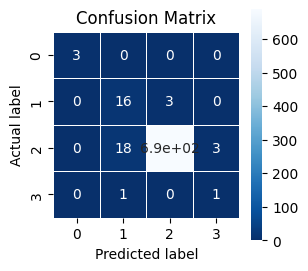

In [ ]:
# Perform the Decision Tree model

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

dt = DecisionTreeClassifier(random_state=1)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_dt = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate the model
y_pred = best_dt.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Classification Report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.xlabel('Predicted label');
plt.ylabel('Actual label');
plt.title("Confusion Matrix", size = 12);

Training Accuracy: 0.9925
Test Accuracy: 0.9850


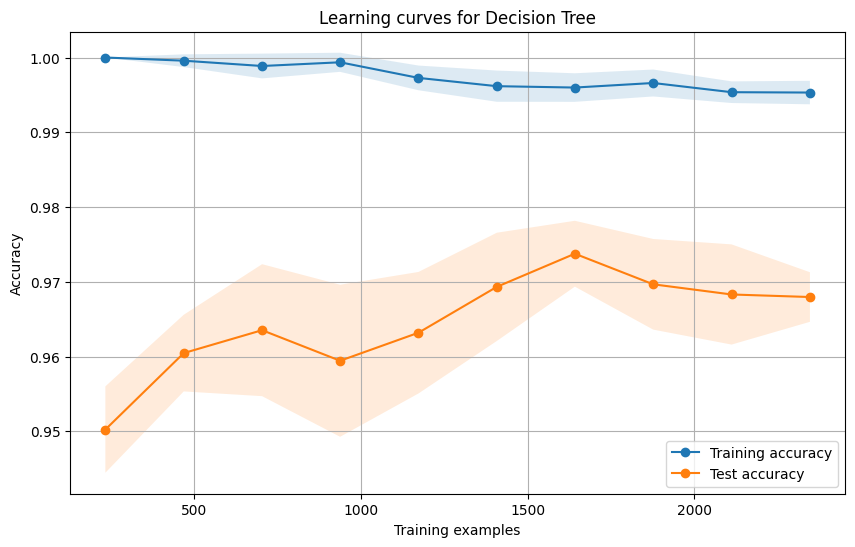

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Initialize Decision Tree classifier
dt = DecisionTreeClassifier(max_depth=10, random_state=1)

# Train the model
dt.fit(X_train, y_train)

# Predict on training set
train_predictions = dt.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Predict on test set
test_predictions = dt.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plotting learning curves
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes, train_scores, test_scores = learning_curve(dt, X_train, y_train, train_sizes=train_sizes, cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training accuracy', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, label='Test accuracy', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)
plt.xlabel('Training examples')
plt.ylabel('Accuracy')
plt.title('Learning curves for Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



## Random Forest Model

---


In [ ]:
# Load dataset
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('planets_clean.csv', comment='#')
df.round(3)

Planet_name  Host_name  Discovery_method  Discovery_year  \
0               0          0                 0            2015   
1               1          1                 1            1996   
2               2          1                 1            2004   
3               3          2                 0            2023   
4               4          3                 2            2020   
...           ...        ...               ...             ...   
3663         3663       2745                 2            2019   
3664         3664       2746                 0            2008   
3665         3665       2747                 2            2018   
3666         3666       2748                 1            1997   
3667         3667       2748                 1            2016   

      Orbital_period_(days)  Orbit_Semi-Major_axis_(AU)  \
0                 11688.000                      13.200   
1                    14.652                       0.113   
2                     0.737                       0.015   
3                  8030.000                       8.400   
4                     8.463                       0.064   
...                     ...                         ...   
3663                  2.864                       0.044   
3664               8617.510                      10.018   
3665                  6.268                       0.069   
3666                 39.844                       0.224   
3667                102.190                       0.421   

      Planet_radius_(Earth_radius)  Planet_density_(g/cm**3)  Eccentricity  \
0                           13.400                     1.450         0.450   
1                           13.900                     0.540         0.000   
2                            1.875                     6.660         0.050   
3                           13.100                     2.490         0.240   
4                            3.957                     1.320         0.186   
...                            ...                       ...           ...   
3663                        15.390                     0.340         0.038   
3664                        18.495                     3.240         0.106   
3665                         2.060                     2.820         0.077   
3666                        13.700                     0.742         0.038   
3667                         5.780                     0.802         0.096   

      Equilibrium_Temperature_[K]  Stellar_effective_temperature_[K]  \
0                           700.0                            7295.00   
1                           700.0                            5172.00   
2                          1958.0                            5172.00   
3                          1400.0                            6130.00   
4                           600.0                            3665.00   
...                           ...                                ...   
3663                       1743.0                            6250.00   
3664                       1612.0                            8038.68   
3665                       1170.0                            6037.00   
3666                        614.0                            5817.00   
3667                        448.0                            5817.00   

      Stellar_radius_(Solar_radius)  Stellar_mass_(Solar_mass)  \
0                              1.49                       1.75   
1                              0.94                       0.91   
2                              0.94                       0.91   
3                              1.25                       1.20   
4                              0.82                       0.50   
...                             ...                        ...   
3663                           1.48                       1.41   
3664                           1.54                       1.80   
3665                           1.19                       1.10   
3666                           1.35       

In [ ]:
df['Discovery_method'].value_counts()

Discovery_method
2    3524
1     117
3      16
0      10
4       1
Name: count, dtype: int64

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.989100817438692
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.88      0.79      0.83        19
           2       0.99      1.00      0.99       710
           3       0.00      0.00      0.00         2

    accuracy                           0.99       734
   macro avg       0.72      0.70      0.71       734
weighted avg       0.99      0.99      0.99       734

[[  3   0   0   0]
 [  0  15   4   0]
 [  0   2 708   0]
 [  0   0   2   0]]


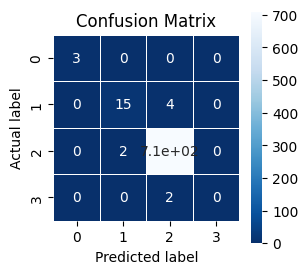

In [ ]:
# Variable assignment
X = df.drop('Discovery_method', axis=1)
y = df['Discovery_method']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=1)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate the model
y_pred = best_rf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Classification Report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.xlabel('Predicted label');
plt.ylabel('Actual label');
plt.title("Confusion Matrix", size = 12);

Training Accuracy: 1.0000
Test Accuracy: 0.9932


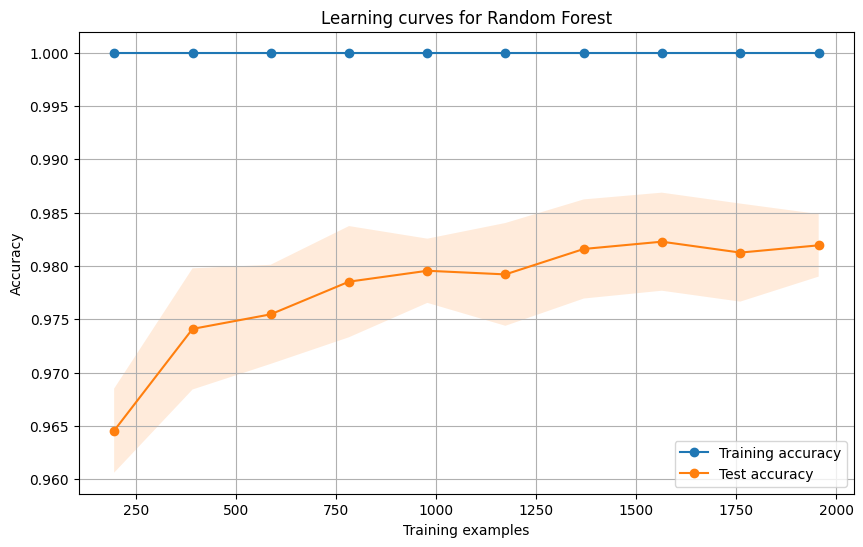

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Initialize Random Forest classifier
rf = RandomForestClassifier(n_estimators=300, random_state=1)

# Train the model
rf.fit(X_train, y_train)

# Predict on training set
train_predictions = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Predict on test set
test_predictions = rf.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plotting learning curves
train_sizes, train_scores, test_scores = learning_curve(rf, X_train, y_train, cv=3,
                                                        train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training accuracy', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, label='Test accuracy', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)
plt.xlabel('Training examples')
plt.ylabel('Accuracy')
plt.title('Learning curves for Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
